In [2]:
!pip install seaborn

   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---------- ---------------------------- 81.9/294.9 kB 919.0 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/294.9 kB 950.9 kB/s eta 0:00:01
   --------------------------- ------------ 204.8/294.9 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00


In [3]:
import pandas as pd
import seaborn as sns
sns.set()
# Load the dataset
file_path = './answer_on_train_fold_two.csv'
data = pd.read_csv(file_path)

# Inspect the first few rows of the dataframe to understand its structure
data.head()


,Question no,Question,Answer_x,Section,Unnamed: 0,topic_id,filename,header,section_text,Fold,Fact,Declined_to_answer_on_train_fold_one,Answer_on_train_fold_one,Declined_to_answer_on_train_fold_two,Answer_on_train_fold_two
0,23,Wanneer moet ik contact opnemen met het zieken...,Als er problemen zijn op de eerste avond of na...,Anale fissuur --- Wanneer contact opnemen met ...,170,0,Anale fissuur,Wanneer contact opnemen met het ziekenhuis?,Als er zich de eerste avond of nacht na de ing...,train_fold_one,"{'entityType': 'Phone', 'value': '+31887087878'}",True,This document does not answer the question,NaN,NaN
1,24,Hoe kan ik contact opnemen met de ZGT poliklin...,U kunt bellen naar 088 708 53 96 tussen 8.30-1...,"Anesthesie, jongeren (POS) --- Vragen --- Moch...",50,0,"Anesthesie, jongeren (POS)",Vragen,Mocht u nog vragen hebben na het lezen van dez...,train_fold_one,"{'entityType': 'Phone', 'value': '+31887085396'}",NaN,NaN,NaN,NaN
2,25,Wat is het telefoonnummer van de afdeling radi...,Het telefoonnummer van de afdeling radiologie ...,"Echografie, armen _ benen (spieren & gewrichte...",30,0,"Echografie, armen _ benen (spieren & gewrichten)",Afzeggen van het onderzoek,Mocht u om wat voor reden dan ook de afspraak ...,train_fold_one,"{'entityType': 'Phone', 'value': '+31887083700'}",NaN,Telefoonnummer: 088 708 37 00,True,The context does not provide information about...
3,26,Wat moet ik doen als ik vragen of complicaties...,U kunt tijdens kantooruren contact opnemen met...,Gebroken heup --- Vragen --- Bij vragen of com...,80,0,Gebroken heup,Vragen,Bij vragen of complicaties kunt u tot twee wek...,train_fold_one,"{'entityType': 'Phone', 'value': '+31887085233'}",NaN,U kunt op werkdagen tussen 08.00 en 16.30 uur ...,NaN,U kunt altijd contact opnemen met een medewerk...
4,27,Wat is het emailadres van de Vereniging aangeb...,Het emailadres van de Vereniging aangeboren he...,Congenitale heupdysplasie --- Informatie --- V...,20,61,Congenitale heupdysplasie,Informatie,Vereniging aangeboren heupafwijkingen Oudstraa...,train_fold_one,"{'entityType': 'Email', 'value': 'info@heupafw...",True,This document does not provide the email addre...,True,This document does not answer the question


In [4]:
# Calculate the percentages required
# First, define a function to check if an answer is given or declined
def is_answered(answer, declined):
    return not(pd.isnull(answer) or declined)

# Apply this function to each fold
data['Answered_fold_one'] = data.apply(lambda x: is_answered(x['Answer_on_train_fold_one'], x['Declined_to_answer_on_train_fold_one']), axis=1)
data['Answered_fold_two'] = data.apply(lambda x: is_answered(x['Answer_on_train_fold_two'], x['Declined_to_answer_on_train_fold_two']), axis=1)

# Calculate percentages
answer_stats = {
    'Fold_one_right_dataset': data[data['Fold'] == 'train_fold_one']['Answered_fold_one'].mean(),
    'Fold_one_wrong_dataset': data[data['Fold'] != 'train_fold_one']['Answered_fold_one'].mean(),
    'Fold_two_right_dataset': data[data['Fold'] == 'train_fold_two']['Answered_fold_two'].mean(),
    'Fold_two_wrong_dataset': data[data['Fold'] != 'train_fold_two']['Answered_fold_two'].mean(),
}

answer_stats


{'Fold_one_right_dataset': 0.0,
 'Fold_one_wrong_dataset': 0.0,
 'Fold_two_right_dataset': 0.0,
 'Fold_two_wrong_dataset': 0.0}

In [5]:
# It seems the previous calculation did not correctly interpret the Declined_to_answer columns as boolean.
# Let's correct the data by explicitly converting any non-null entries in the Declined_to_answer columns to True, 
# and any NaN entries to False.

# Convert 'Declined_to_answer' columns to boolean where NaN is False and any non-null is True
data['Declined_to_answer_on_train_fold_one'] = data['Declined_to_answer_on_train_fold_one'].notnull()
data['Declined_to_answer_on_train_fold_two'] = data['Declined_to_answer_on_train_fold_two'].notnull()

# Recalculate the answered status with the corrected boolean columns
data['Answered_fold_one'] = data.apply(lambda x: is_answered(x['Answer_on_train_fold_one'], x['Declined_to_answer_on_train_fold_one']), axis=1)
data['Answered_fold_two'] = data.apply(lambda x: is_answered(x['Answer_on_train_fold_two'], x['Declined_to_answer_on_train_fold_two']), axis=1)

# Recalculate the percentages
answer_stats_corrected = {
    'Fold_one_right_dataset': data[data['Fold'] == 'train_fold_one']['Answered_fold_one'].mean(),
    'Fold_one_wrong_dataset': data[data['Fold'] != 'train_fold_one']['Answered_fold_one'].mean(),
    'Fold_two_right_dataset': data[data['Fold'] == 'train_fold_two']['Answered_fold_two'].mean(),
    'Fold_two_wrong_dataset': data[data['Fold'] != 'train_fold_two']['Answered_fold_two'].mean(),
}

answer_stats_corrected


{'Fold_one_right_dataset': 0.5733333333333334,
 'Fold_one_wrong_dataset': 0.07518796992481203,
 'Fold_two_right_dataset': 0.6240601503759399,
 'Fold_two_wrong_dataset': 0.12}

In [6]:
# Calculate the full numbers (x out of n) for each scenario
def calculate_full_numbers(data, fold_col, answered_col):
    total = len(data)
    answered = data[answered_col].sum()
    return answered, total

# Calculate numbers for fold one with the right dataset
answered_fold_one_right, total_fold_one_right = calculate_full_numbers(data[data['Fold'] == 'train_fold_one'], 'Fold', 'Answered_fold_one')

# Calculate numbers for fold one with the wrong dataset
answered_fold_one_wrong, total_fold_one_wrong = calculate_full_numbers(data[data['Fold'] != 'train_fold_one'], 'Fold', 'Answered_fold_one')

# Calculate numbers for fold two with the right dataset
answered_fold_two_right, total_fold_two_right = calculate_full_numbers(data[data['Fold'] == 'train_fold_two'], 'Fold', 'Answered_fold_two')

# Calculate numbers for fold two with the wrong dataset
answered_fold_two_wrong, total_fold_two_wrong = calculate_full_numbers(data[data['Fold'] != 'train_fold_two'], 'Fold', 'Answered_fold_two')

full_numbers = {
    'Fold_one_right_dataset': f"{answered_fold_one_right} out of {total_fold_one_right}",
    'Fold_one_wrong_dataset': f"{answered_fold_one_wrong} out of {total_fold_one_wrong}",
    'Fold_two_right_dataset': f"{answered_fold_two_right} out of {total_fold_two_right}",
    'Fold_two_wrong_dataset': f"{answered_fold_two_wrong} out of {total_fold_two_wrong}",
}

full_numbers

{'Fold_one_right_dataset': '43 out of 75',
 'Fold_one_wrong_dataset': '10 out of 133',
 'Fold_two_right_dataset': '83 out of 133',
 'Fold_two_wrong_dataset': '9 out of 75'}

{'Fold_one_right_dataset': 0.5733333333333334,
 'Fold_one_wrong_dataset': 0.07518796992481203,
 'Fold_two_right_dataset': 0.6240601503759399,
 'Fold_two_wrong_dataset': 0.12}
 
When the correct dataset for fold one was loaded, the model provided an answer 
57.33
%
57.33% of the time.
When the wrong dataset for fold one was used, the model attempted to provide an answer 
7.52
%
7.52% of the time.
When the correct dataset for fold two was loaded, the model provided an answer 
62.41
%
62.41% of the time.
When the wrong dataset for fold two was used, the model attempted to provide an answer 
12.00
%
12.00% of the time.

{'Fold_one_right_dataset': '43 out of 75',
 'Fold_one_wrong_dataset': '10 out of 133',
 'Fold_two_right_dataset': '83 out of 133',
 'Fold_two_wrong_dataset': '9 out of 75'}

In [7]:
from nltk.translate.bleu_score import sentence_bleu

# Filter the data to include only pairs where the answer is in the fold it is answering
# and is not declined/empty, and the fact column is empty.
data_filtered_fold_one = data[(data['Fold'] == 'train_fold_one') & (data['Answered_fold_one']) & (data['Fact'].isnull())]
data_filtered_fold_two = data[(data['Fold'] == 'train_fold_two') & (data['Answered_fold_two']) & (data['Fact'].isnull())]

# Define a function to calculate BLEU score for a given reference and candidate sentence
def calculate_bleu(reference, candidate):
    # Preprocess the sentences: Tokenization could be done here if necessary
    reference = [reference.split()]  # BLEU expects a list of references
    candidate = candidate.split()
    # Calculate BLEU score
    return sentence_bleu(reference, candidate)

# Calculate BLEU scores for fold one and fold two
bleu_scores_fold_one = [calculate_bleu(ref, cand) for ref, cand in zip(data_filtered_fold_one['Answer_x'], data_filtered_fold_one['Answer_on_train_fold_one'])]
bleu_scores_fold_two = [calculate_bleu(ref, cand) for ref, cand in zip(data_filtered_fold_two['Answer_x'], data_filtered_fold_two['Answer_on_train_fold_two'])]

# Aggregate BLEU scores
avg_bleu_score_fold_one = sum(bleu_scores_fold_one) / len(bleu_scores_fold_one) if bleu_scores_fold_one else 0
avg_bleu_score_fold_two = sum(bleu_scores_fold_two) / len(bleu_scores_fold_two) if bleu_scores_fold_two else 0

(avg_bleu_score_fold_one, avg_bleu_score_fold_two)


C:\Users\szond\anaconda3\envs\Automated-QA-Generation\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\szond\anaconda3\envs\Automated-QA-Generation\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
C:\Users\szond\anaconda3\envs\Automated-QA-Generation\lib\site-packages\nltk\translate\bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower o

(0.07342406181123531, 0.07769184150295552)

For fold one, the average BLEU score is approximately 
0.0734
0.0734.
For fold two, the average BLEU score is approximately 
0.0777
0.0777.

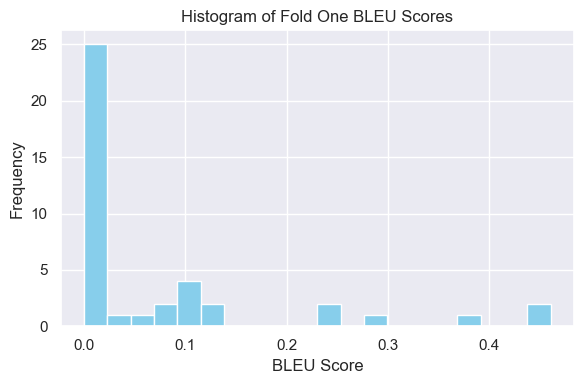

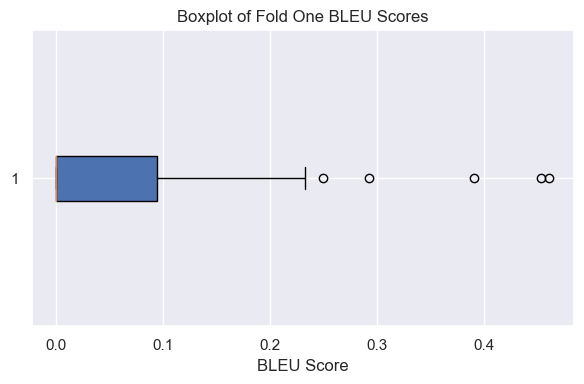

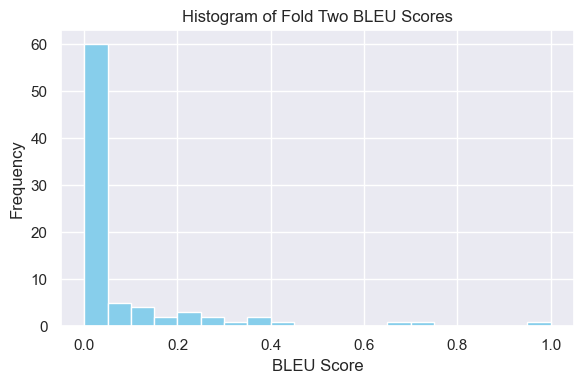

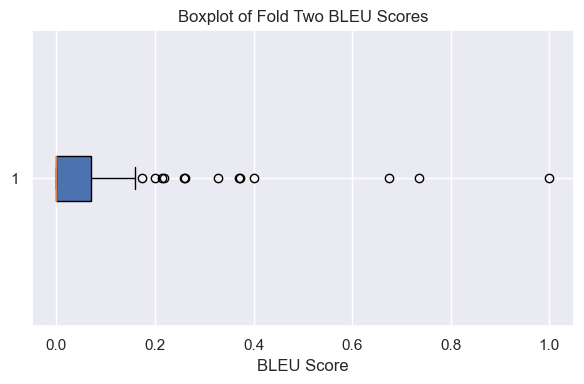

In [8]:
import matplotlib.pyplot as plt

# Define a function to create individual histogram and boxplot for BLEU scores
def plot_individual_scores(scores, title, score_type):
    plt.figure(figsize=(6, 4))
    
    if score_type == 'histogram':
        # Histogram
        plt.hist(scores, bins=20, color='skyblue')
        plt.title(f'Histogram of {title} BLEU Scores')
        plt.xlabel('BLEU Score')
        plt.ylabel('Frequency')
    elif score_type == 'boxplot':
        # Boxplot
        plt.boxplot(scores, vert=False, patch_artist=True)
        plt.title(f'Boxplot of {title} BLEU Scores')
        plt.xlabel('BLEU Score')

    plt.tight_layout()
    plt.show()

# Create separate histograms and boxplots for fold one and fold two BLEU scores
plot_individual_scores(bleu_scores_fold_one, 'Fold One', 'histogram')
plot_individual_scores(bleu_scores_fold_one, 'Fold One', 'boxplot')
plot_individual_scores(bleu_scores_fold_two, 'Fold Two', 'histogram')
plot_individual_scores(bleu_scores_fold_two, 'Fold Two', 'boxplot')


In [9]:
# Define a function to save individual histogram and boxplot for scores to a file
def save_plot_scores(scores, title, score_type, folder_path):
    plt.figure(figsize=(6, 4))
    
    if score_type == 'histogram':
        # Histogram
        plt.hist(scores, bins=20, color='skyblue')
        plt.title(f'Histogram of {title} BLEU Scores')
        plt.xlabel('BLEU Score')
        plt.ylabel('Frequency')
        filename = f"{folder_path}/{title}_Histogram.png"
    elif score_type == 'boxplot':
        # Boxplot
        plt.boxplot(scores, vert=False, patch_artist=True)
        plt.title(f'Boxplot of {title} BLEU Scores')
        plt.xlabel('BLEU Score')
        filename = f"{folder_path}/{title}_Boxplot.png"

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Directory where the plots will be saved
results_folder = './results'

# Code to save the histograms and boxplots for BLEU scores to files
save_plot_scores(bleu_scores_fold_one, 'Fold_One', 'histogram', results_folder)
save_plot_scores(bleu_scores_fold_one, 'Fold_One', 'boxplot', results_folder)
save_plot_scores(bleu_scores_fold_two, 'Fold_Two', 'histogram', results_folder)
save_plot_scores(bleu_scores_fold_two, 'Fold_Two', 'boxplot', results_folder)

# The resulting filenames will be:
# For fold one histogram: /mnt/data/results/Fold_One_Histogram.png
# For fold one boxplot: /mnt/data/results/Fold_One_Boxplot.png
# For fold two histogram: /mnt/data/results/Fold_Two_Histogram.png
# For fold two boxplot: /mnt/data/results/Fold_Two_Boxplot.png


# Rouge

In [10]:
# Since the previous attempt to calculate ROUGE scores using a custom function failed, let's try using the 'rouge_score' library.

from rouge_score import rouge_scorer
import os

# Initialize the rouge scorer
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

# Define a function to calculate ROUGE scores for a list of reference-candidate sentence pairs
def calculate_rouge_scores(references, candidates):
    rouge_1_scores = []
    rouge_2_scores = []
    rouge_l_scores = []
    
    for ref, cand in zip(references, candidates):
        scores = scorer.score(ref, cand)
        rouge_1_scores.append(scores['rouge1'].fmeasure)
        rouge_2_scores.append(scores['rouge2'].fmeasure)
        rouge_l_scores.append(scores['rougeL'].fmeasure)
    
    return rouge_1_scores, rouge_2_scores, rouge_l_scores

# Calculate ROUGE scores for fold one and fold two
rouge_1_scores_fold_one, rouge_2_scores_fold_one, rouge_l_scores_fold_one = calculate_rouge_scores(
    data_filtered_fold_one['Answer_x'], data_filtered_fold_one['Answer_on_train_fold_one']
)

rouge_1_scores_fold_two, rouge_2_scores_fold_two, rouge_l_scores_fold_two = calculate_rouge_scores(
    data_filtered_fold_two['Answer_x'], data_filtered_fold_two['Answer_on_train_fold_two']
)

# Define a function to save individual histogram and boxplot for scores to a file
def save_plot_scores(scores, title, score_type, folder_path):
    plt.figure(figsize=(6, 4))
    
    if score_type == 'histogram':
        # Histogram
        plt.hist(scores, bins=20, color='skyblue')
        plt.title(f'Histogram of {title} Scores')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        filename = f"{folder_path}/{title}_Histogram.png"
    elif score_type == 'boxplot':
        # Boxplot
        plt.boxplot(scores, vert=False, patch_artist=True)
        plt.title(f'Boxplot of {title} Scores')
        plt.xlabel('Score')
        filename = f"{folder_path}/{title}_Boxplot.png"

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Directory where the plots will be saved
results_folder = './results'

# Create the results directory if it does not exist
os.makedirs(results_folder, exist_ok=True)

# Save the histograms and boxplots for ROUGE scores to files
save_plot_scores(rouge_1_scores_fold_one, 'Fold_One_ROUGE-1', 'histogram', results_folder)
save_plot_scores(rouge_1_scores_fold_one, 'Fold_One_ROUGE-1', 'boxplot', results_folder)
save_plot_scores(rouge_2_scores_fold_one, 'Fold_One_ROUGE-2', 'histogram', results_folder)
save_plot_scores(rouge_2_scores_fold_one, 'Fold_One_ROUGE-2', 'boxplot', results_folder)
save_plot_scores(rouge_l_scores_fold_one, 'Fold_One_ROUGE-L', 'histogram', results_folder)
save_plot_scores(rouge_l_scores_fold_one, 'Fold_One_ROUGE-L', 'boxplot', results_folder)

save_plot_scores(rouge_1_scores_fold_two, 'Fold_Two_ROUGE-1', 'histogram', results_folder)
save_plot_scores(rouge_1_scores_fold_two, 'Fold_Two_ROUGE-1', 'boxplot', results_folder)
save_plot_scores(rouge_2_scores_fold_two, 'Fold_Two_ROUGE-2', 'histogram', results_folder)
save_plot_scores(rouge_2_scores_fold_two, 'Fold_Two_ROUGE-2', 'boxplot', results_folder)
save_plot_scores(rouge_l_scores_fold_two, 'Fold_Two_ROUGE-L', 'histogram', results_folder)
save_plot_scores(rouge_l_scores_fold_two, 'Fold_Two_ROUGE-L', 'boxplot', results_folder)

# Return the paths to the saved plots
os.listdir(results_folder)


['Fold_One_BLEURT_Boxplot.png',
 'Fold_One_BLEURT_Histogram.png',
 'Fold_One_Boxplot.png',
 'Fold_One_Histogram.png',
 'Fold_One_ROUGE-1_Boxplot.png',
 'Fold_One_ROUGE-1_Histogram.png',
 'Fold_One_ROUGE-2_Boxplot.png',
 'Fold_One_ROUGE-2_Histogram.png',
 'Fold_One_ROUGE-L_Boxplot.png',
 'Fold_One_ROUGE-L_Histogram.png',
 'Fold_One_ROUGE_Scores_Combined_Boxplot.png',
 'Fold_One_ROUGE_Scores_Combined_Histogram.png',
 'Fold_Two_BLEURT_Boxplot.png',
 'Fold_Two_BLEURT_Histogram.png',
 'Fold_Two_Boxplot.png',
 'Fold_Two_Histogram.png',
 'Fold_Two_ROUGE-1_Boxplot.png',
 'Fold_Two_ROUGE-1_Histogram.png',
 'Fold_Two_ROUGE-2_Boxplot.png',
 'Fold_Two_ROUGE-2_Histogram.png',
 'Fold_Two_ROUGE-L_Boxplot.png',
 'Fold_Two_ROUGE-L_Histogram.png',
 'Fold_Two_ROUGE_Scores_Combined_Boxplot.png',
 'Fold_Two_ROUGE_Scores_Combined_Histogram.png']

In [11]:
# Calculate the average ROUGE scores for fold one
avg_rouge_1_fold_one = sum(rouge_1_scores_fold_one) / len(rouge_1_scores_fold_one)
avg_rouge_2_fold_one = sum(rouge_2_scores_fold_one) / len(rouge_2_scores_fold_one)
avg_rouge_l_fold_one = sum(rouge_l_scores_fold_one) / len(rouge_l_scores_fold_one)

# Print the average ROUGE scores for fold one
print("Average ROUGE-1 score for Fold One:", avg_rouge_1_fold_one)
print("Average ROUGE-2 score for Fold One:", avg_rouge_2_fold_one)
print("Average ROUGE-L score for Fold One:", avg_rouge_l_fold_one)

# Assuming similar variables exist for fold two, calculate and print their averages
avg_rouge_1_fold_two = sum(rouge_1_scores_fold_two) / len(rouge_1_scores_fold_two)
avg_rouge_2_fold_two = sum(rouge_2_scores_fold_two) / len(rouge_2_scores_fold_two)
avg_rouge_l_fold_two = sum(rouge_l_scores_fold_two) / len(rouge_l_scores_fold_two)

# Print the average ROUGE scores for fold two
print("Average ROUGE-1 score for Fold Two:", avg_rouge_1_fold_two)
print("Average ROUGE-2 score for Fold Two:", avg_rouge_2_fold_two)
print("Average ROUGE-L score for Fold Two:", avg_rouge_l_fold_two)


Average ROUGE-1 score for Fold One: 0.3121114967325757
Average ROUGE-2 score for Fold One: 0.18806539457299593
Average ROUGE-L score for Fold One: 0.2594977255370399
Average ROUGE-1 score for Fold Two: 0.2612439604062285
Average ROUGE-2 score for Fold Two: 0.1544656763371391
Average ROUGE-L score for Fold Two: 0.2224395807348011


In [12]:
import matplotlib.pyplot as plt
import os

# Function to save a combined boxplot for ROUGE-1, ROUGE-2, and ROUGE-L scores for a single fold
def save_combined_rouge_boxplot(scores_rouge1, scores_rouge2, scores_rougeL, title, folder_path):
    plt.figure(figsize=(10, 6))
    data = [scores_rouge1, scores_rouge2, scores_rougeL]
    plt.boxplot(data, vert=False, patch_artist=True, labels=['ROUGE-1', 'ROUGE-2', 'ROUGE-L'])
    plt.title(f'Combined Boxplot of {title}')
    plt.xlabel('Score')
    filename = f"{folder_path}/{title}_Combined_Boxplot.png"
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Directory where the plots will be saved
results_folder = './results'

# Create the results directory if it does not exist
os.makedirs(results_folder, exist_ok=True)

# Save the combined boxplots for both folds
save_combined_rouge_boxplot(rouge_1_scores_fold_one, rouge_2_scores_fold_one, rouge_l_scores_fold_one, 'Fold_One_ROUGE_Scores', results_folder)
save_combined_rouge_boxplot(rouge_1_scores_fold_two, rouge_2_scores_fold_two, rouge_l_scores_fold_two, 'Fold_Two_ROUGE_Scores', results_folder)

# Optionally, list the files in the results directory to verify the plots have been saved
files_in_results_folder = os.listdir(results_folder)
print(files_in_results_folder)


['Fold_One_BLEURT_Boxplot.png', 'Fold_One_BLEURT_Histogram.png', 'Fold_One_Boxplot.png', 'Fold_One_Histogram.png', 'Fold_One_ROUGE-1_Boxplot.png', 'Fold_One_ROUGE-1_Histogram.png', 'Fold_One_ROUGE-2_Boxplot.png', 'Fold_One_ROUGE-2_Histogram.png', 'Fold_One_ROUGE-L_Boxplot.png', 'Fold_One_ROUGE-L_Histogram.png', 'Fold_One_ROUGE_Scores_Combined_Boxplot.png', 'Fold_One_ROUGE_Scores_Combined_Histogram.png', 'Fold_Two_BLEURT_Boxplot.png', 'Fold_Two_BLEURT_Histogram.png', 'Fold_Two_Boxplot.png', 'Fold_Two_Histogram.png', 'Fold_Two_ROUGE-1_Boxplot.png', 'Fold_Two_ROUGE-1_Histogram.png', 'Fold_Two_ROUGE-2_Boxplot.png', 'Fold_Two_ROUGE-2_Histogram.png', 'Fold_Two_ROUGE-L_Boxplot.png', 'Fold_Two_ROUGE-L_Histogram.png', 'Fold_Two_ROUGE_Scores_Combined_Boxplot.png', 'Fold_Two_ROUGE_Scores_Combined_Histogram.png']


In [13]:
import matplotlib.pyplot as plt
import os
import numpy as np

# Function to save a combined histogram for ROUGE-1, ROUGE-2, and ROUGE-L scores for a single fold
def save_combined_rouge_histogram(scores_rouge1, scores_rouge2, scores_rougeL, title, folder_path):
    plt.figure(figsize=(10, 6))
    bins = np.linspace(0, 1, 20)  # Adjust the range and bin size as appropriate for your scores
    
    plt.hist(scores_rouge1, bins, alpha=0.5, label='ROUGE-1', color='skyblue')
    plt.hist(scores_rouge2, bins, alpha=0.5, label='ROUGE-2', color='lightgreen')
    plt.hist(scores_rougeL, bins, alpha=0.5, label='ROUGE-L', color='salmon')
    
    plt.title(f'Combined Histogram of {title}')
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.legend(loc='upper left')
    filename = f"{folder_path}/{title}_Combined_Histogram.png"
    
    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Directory where the plots will be saved
results_folder = './results'

# Ensure the results directory exists
os.makedirs(results_folder, exist_ok=True)

# Save the combined histograms for both folds
save_combined_rouge_histogram(rouge_1_scores_fold_one, rouge_2_scores_fold_one, rouge_l_scores_fold_one, 'Fold_One_ROUGE_Scores', results_folder)
save_combined_rouge_histogram(rouge_1_scores_fold_two, rouge_2_scores_fold_two, rouge_l_scores_fold_two, 'Fold_Two_ROUGE_Scores', results_folder)

# Optionally, list the files in the results directory to verify the plots have been saved
files_in_results_folder = os.listdir(results_folder)
print(files_in_results_folder)


['Fold_One_BLEURT_Boxplot.png', 'Fold_One_BLEURT_Histogram.png', 'Fold_One_Boxplot.png', 'Fold_One_Histogram.png', 'Fold_One_ROUGE-1_Boxplot.png', 'Fold_One_ROUGE-1_Histogram.png', 'Fold_One_ROUGE-2_Boxplot.png', 'Fold_One_ROUGE-2_Histogram.png', 'Fold_One_ROUGE-L_Boxplot.png', 'Fold_One_ROUGE-L_Histogram.png', 'Fold_One_ROUGE_Scores_Combined_Boxplot.png', 'Fold_One_ROUGE_Scores_Combined_Histogram.png', 'Fold_Two_BLEURT_Boxplot.png', 'Fold_Two_BLEURT_Histogram.png', 'Fold_Two_Boxplot.png', 'Fold_Two_Histogram.png', 'Fold_Two_ROUGE-1_Boxplot.png', 'Fold_Two_ROUGE-1_Histogram.png', 'Fold_Two_ROUGE-2_Boxplot.png', 'Fold_Two_ROUGE-2_Histogram.png', 'Fold_Two_ROUGE-L_Boxplot.png', 'Fold_Two_ROUGE-L_Histogram.png', 'Fold_Two_ROUGE_Scores_Combined_Boxplot.png', 'Fold_Two_ROUGE_Scores_Combined_Histogram.png']


In [14]:
# Bleurt

In [15]:
!pip install tensorflow
!git clone https://github.com/google-research/bleurt.git
!cd bleurt & pip install .


fatal: destination path 'bleurt' already exists and is not an empty directory.


Processing c:\programming\automated-qa-generation\qa-gen\evaluation\bleurt
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for BLEURT: filename=BLEURT-0.0.2-py3-none-any.whl size=16460624 sha256=297938f6254140fae3efc239f73e49aacdba767504cd183c7bdc18fb10434f23
  Stored in directory: C:\Users\szond\AppData\Local\Temp\pip-ephem-wheel-cache-tj1qfvwc\wheels\9e\3e\d6\623eb6f2597b5df4315da15e33ecafa18acc6ae6fd25d43226
Successfully built BLEURT
  Attempting uninstall: BLEURT
    Found existing installation: BLEURT 0.0.2
    Uninstalling BLEURT-0.0.2:
      Successfully uninstalled BLEURT-0.0.2


In [16]:
# Download the BLEURT-20 checkpoint
!wget https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip

# Unzip the downloaded checkpoint
!unzip BLEURT-20.zip


SYSTEM_WGETRC = c:/progra~1/wget/etc/wgetrc
syswgetrc = C:\Program Files (x86)\GnuWin32/etc/wgetrc
--2024-02-02 18:57:57--  https://storage.googleapis.com/bleurt-oss-21/BLEURT-20.zip
Resolving storage.googleapis.com... 142.250.179.187, 142.250.179.219, 142.251.36.27, ...
Connecting to storage.googleapis.com|142.250.179.187|:443... connected.
ERROR: cannot verify storage.googleapis.com's certificate, issued by `/C=US/O=Google Trust Services LLC/CN=GTS CA 1C3':
  Unable to locally verify the issuer's authority.
ERROR: certificate common name `*.storage.googleapis.com' doesn't match requested host name `storage.googleapis.com'.
To connect to storage.googleapis.com insecurely, use `--no-check-certificate'.
Unable to establish SSL connection.
'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [17]:
from bleurt import score

# Assume you have initialized and set up BLEURT as per the instructions
checkpoint = "./bleurt/BLEURT-20"  # Update this path
scorer = score.BleurtScorer(checkpoint)

# Filter the data to include only pairs where the answer is in the fold it is answering,
# is not declined/empty, and the fact column is empty.
data_filtered_fold_one = data[(data['Fold'] == 'train_fold_one') & (data['Answered_fold_one']) & (data['Fact'].isnull())]
data_filtered_fold_two = data[(data['Fold'] == 'train_fold_two') & (data['Answered_fold_two']) & (data['Fact'].isnull())]

# Define a function to calculate BLEURT score for a given reference and candidate sentence
def calculate_bleurt(reference, candidate):
    # BLEURT expects the reference and candidate as strings directly
    scores = scorer.score(references=[reference], candidates=[candidate])
    # Return the first score (since we're scoring one pair at a time)
    return scores[0]

# Calculate BLEURT scores for fold one and fold two
bleurt_scores_fold_one = [calculate_bleurt(ref, cand) for ref, cand in zip(data_filtered_fold_one['Answer_x'], data_filtered_fold_one['Answer_on_train_fold_one'])]
bleurt_scores_fold_two = [calculate_bleurt(ref, cand) for ref, cand in zip(data_filtered_fold_two['Answer_x'], data_filtered_fold_two['Answer_on_train_fold_two'])]

# Aggregate BLEURT scores
avg_bleurt_score_fold_one = sum(bleurt_scores_fold_one) / len(bleurt_scores_fold_one) if bleurt_scores_fold_one else 0
avg_bleurt_score_fold_two = sum(bleurt_scores_fold_two) / len(bleurt_scores_fold_two) if bleurt_scores_fold_two else 0

print("Average BLEURT Score for Fold One:", avg_bleurt_score_fold_one)
print("Average BLEURT Score for Fold Two:", avg_bleurt_score_fold_two)


Average BLEURT Score for Fold One: 0.5916975402250523
Average BLEURT Score for Fold Two: 0.5170760126896652


In [18]:
import matplotlib.pyplot as plt
import os

# Define a function to save individual histogram and boxplot for BLEURT scores to a file
def save_plot_scores(scores, title, score_type, folder_path):
    plt.figure(figsize=(6, 4))
    
    if score_type == 'histogram':
        # Histogram
        plt.hist(scores, bins=20, color='skyblue')
        plt.title(f'Histogram of {title} Scores')
        plt.xlabel('Score')
        plt.ylabel('Frequency')
        filename = f"{folder_path}/{title}_Histogram.png"
    elif score_type == 'boxplot':
        # Boxplot
        plt.boxplot(scores, vert=False, patch_artist=True)
        plt.title(f'Boxplot of {title} Scores')
        plt.xlabel('Score')
        filename = f"{folder_path}/{title}_Boxplot.png"

    plt.tight_layout()
    plt.savefig(filename)
    plt.close()

# Directory where the plots will be saved
results_folder = './results'

# Create the results directory if it does not exist
os.makedirs(results_folder, exist_ok=True)

# Save the histograms and boxplots for BLEURT scores to files
save_plot_scores(bleurt_scores_fold_one, 'Fold_One_BLEURT', 'histogram', results_folder)
save_plot_scores(bleurt_scores_fold_one, 'Fold_One_BLEURT', 'boxplot', results_folder)
save_plot_scores(bleurt_scores_fold_two, 'Fold_Two_BLEURT', 'histogram', results_folder)
save_plot_scores(bleurt_scores_fold_two, 'Fold_Two_BLEURT', 'boxplot', results_folder)

# Optionally, list the files in the results directory to verify the plots have been saved
files_in_results_folder = os.listdir(results_folder)
print(files_in_results_folder)


['Fold_One_BLEURT_Boxplot.png', 'Fold_One_BLEURT_Histogram.png', 'Fold_One_Boxplot.png', 'Fold_One_Histogram.png', 'Fold_One_ROUGE-1_Boxplot.png', 'Fold_One_ROUGE-1_Histogram.png', 'Fold_One_ROUGE-2_Boxplot.png', 'Fold_One_ROUGE-2_Histogram.png', 'Fold_One_ROUGE-L_Boxplot.png', 'Fold_One_ROUGE-L_Histogram.png', 'Fold_One_ROUGE_Scores_Combined_Boxplot.png', 'Fold_One_ROUGE_Scores_Combined_Histogram.png', 'Fold_Two_BLEURT_Boxplot.png', 'Fold_Two_BLEURT_Histogram.png', 'Fold_Two_Boxplot.png', 'Fold_Two_Histogram.png', 'Fold_Two_ROUGE-1_Boxplot.png', 'Fold_Two_ROUGE-1_Histogram.png', 'Fold_Two_ROUGE-2_Boxplot.png', 'Fold_Two_ROUGE-2_Histogram.png', 'Fold_Two_ROUGE-L_Boxplot.png', 'Fold_Two_ROUGE-L_Histogram.png', 'Fold_Two_ROUGE_Scores_Combined_Boxplot.png', 'Fold_Two_ROUGE_Scores_Combined_Histogram.png']


# Entity

In [19]:
import re
import json
# Display the head of the dataframe where the 'Fact' column is not empty
data_with_fact = data[data['Fact'].notnull()]

# Display the first few rows of this filtered dataframe
data_with_fact.head()


def extract_and_verify_info(row):
    # Extracting the fact value
    fact_info = json.loads(row['Fact'].replace("'", "\""))
    fact_type = fact_info['entityType']
    fact_value = fact_info['value']
    
    # Choosing the right answer based on the fold
    if row['Fold'] == 'train_fold_one' and row['Answered_fold_one']:
        answer = row['Answer_on_train_fold_one']
    elif row['Fold'] == 'train_fold_two' and row['Answered_fold_two']:
        answer = row['Answer_on_train_fold_two']
    else:
        return False  # No answer or not the right fold
    
    # Normalize and extract information based on fact type
    if fact_type == 'Email':
        pattern = r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b'
        extracted_emails = re.findall(pattern, answer)
        normalized_fact_value = fact_value.lower()
        return normalized_fact_value in [email.lower() for email in extracted_emails]
    
    elif fact_type == 'Phone':
        pattern = r'\+?\d[\d -]{8,}\d'
        extracted_phones = re.findall(pattern, answer)
        # Normalize by removing spaces, dashes, and leading zeros
        normalized_fact_value = fact_value.replace(" ", "").replace("-", "").lstrip("0")
        normalized_extracted_phones = [phone.replace(" ", "").replace("-", "").lstrip("0") for phone in extracted_phones]
        return normalized_fact_value in normalized_extracted_phones
    
    return False

# Apply the function to each row in the dataframe where 'Fact' is not empty
data_with_fact['Verification_Result'] = data_with_fact.apply(extract_and_verify_info, axis=1)

# Check the results
data_with_fact[['Question', 'Fact', 'Verification_Result']].head()


C:\Users\szond\AppData\Local\Temp\ipykernel_23892\4226868502.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_with_fact['Verification_Result'] = data_with_fact.apply(extract_and_verify_info, axis=1)


,Question,Fact,Verification_Result
0,Wanneer moet ik contact opnemen met het zieken...,"{'entityType': 'Phone', 'value': '+31887087878'}",False
1,Hoe kan ik contact opnemen met de ZGT poliklin...,"{'entityType': 'Phone', 'value': '+31887085396'}",False
2,Wat is het telefoonnummer van de afdeling radi...,"{'entityType': 'Phone', 'value': '+31887083700'}",False
3,Wat moet ik doen als ik vragen of complicaties...,"{'entityType': 'Phone', 'value': '+31887085233'}",False
4,Wat is het emailadres van de Vereniging aangeb...,"{'entityType': 'Email', 'value': 'info@heupafw...",False


In [20]:
# Assuming the 'Verification_Result' column exists in 'data_with_fact'

# Filter verified results for each fold
verified_fold_one = data_with_fact[(data_with_fact['Fold'] == 'train_fold_one') & (data_with_fact['Verification_Result'])]
verified_fold_two = data_with_fact[(data_with_fact['Fold'] == 'train_fold_two') & (data_with_fact['Verification_Result'])]
print(verified_fold_one.head())
print(verified_fold_two.head())

# Calculate percentages
percentage_correct_fold_one = len(verified_fold_one) / len(data_with_fact[data_with_fact['Fold'] == 'train_fold_one']) * 100
percentage_correct_fold_two = len(verified_fold_two) / len(data_with_fact[data_with_fact['Fold'] == 'train_fold_two']) * 100

print(f"Percentage correct for Fold One: {percentage_correct_fold_one}%")
print(f"Percentage correct for Fold Two: {percentage_correct_fold_two}%")


Empty DataFrame
Columns: [Question no, Question, Answer_x, Section, Unnamed: 0, topic_id, filename, header, section_text, Fold, Fact, Declined_to_answer_on_train_fold_one, Answer_on_train_fold_one, Declined_to_answer_on_train_fold_two, Answer_on_train_fold_two, Answered_fold_one, Answered_fold_two, Verification_Result]
Index: []
Empty DataFrame
Columns: [Question no, Question, Answer_x, Section, Unnamed: 0, topic_id, filename, header, section_text, Fold, Fact, Declined_to_answer_on_train_fold_one, Answer_on_train_fold_one, Declined_to_answer_on_train_fold_two, Answer_on_train_fold_two, Answered_fold_one, Answered_fold_two, Verification_Result]
Index: []


ZeroDivisionError: division by zero